# HDBSCAN clustering of Inquiry and Discipline dictionary wordvecs

### Installing hdbscan

In [1]:
!pip install --upgrade numpy

    100% |████████████████████████████████| 13.9MB 1.6MB/s eta 0:00:01
  Found existing installation: numpy 1.13.3
    Uninstalling numpy-1.13.3:
      Successfully uninstalled numpy-1.13.3


In [2]:
!pip install hdbscan

    100% |████████████████████████████████| 4.0MB 6.9MB/s eta 0:00:01
  Installing build dependencies ... done
  Running setup.py bdist_wheel for hdbscan ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/80/6c/bb/80343f12bfe907f9475ae274a59677bec4525104455a6c2554
Successfully built hdbscan


In [3]:
import time

In [4]:
%matplotlib inline
import pickle
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import hdbscan
import pandas as pd
import numpy as np
import gensim

# define paths
wem_newpath = "../Charter-school-identities/data/wem_model_train250_nostem_unlapped_300d.txt"
dict_path = '/home/jovyan/work/Charter-school-identities/dicts/'

In [5]:
# load model
model = gensim.models.KeyedVectors.load_word2vec_format(wem_newpath)

In [6]:
# load dicts/wordvecs
dict_list = []
word_vecs_list = []
core_list = []
core_word_list = []
word_list = []
dict_names = ['inquiry', 'discipline']
for name in dict_names:
    with open(dict_path+name+'.txt') as f: 
        new_dict = f.read().splitlines()
        word_vecs = []
        core = []
        core_word = []
        word = []
        for i, entry in enumerate(new_dict):
            try:
                if i < 30:
                    core.append(model[entry])
                    core_word.append(entry)
                if len(word_vecs)<350: # Limit full dicts to same max value
                    word_vecs.append(model[entry])
                    word.append(entry)
            except:
                pass
        dict_list.append(new_dict)
        word_vecs_list.append(word_vecs)
        core_list.append(core)
        core_word_list.append(core_word)
        word_list.append(word)

In [7]:
# normalization of vectors
row_sums_0 = np.linalg.norm(word_vecs_list[0], axis=1)
row_sums_1 = np.linalg.norm(word_vecs_list[1], axis=1)
unit_vecs_list = [word_vecs_list[0] / row_sums_0[:, np.newaxis],word_vecs_list[1] / row_sums_1[:, np.newaxis]]
unit_cores_list = [core_list[0] / np.linalg.norm(core_list[0], axis=1)[:, np.newaxis],core_list[1] / np.linalg.norm(core_list[1], axis=1)[:, np.newaxis]]

### (IGNORE)PCA attempt to reduce wordvec dimension size so hdbscan works better

In [56]:
pca = PCA()
pca.fit(word_vecs_list[0]+word_vecs_list[1])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [80]:
np.where(np.cumsum(pca.explained_variance_ratio_) > .85)

(array([ 98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
        111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122]),)

In [81]:
pca = PCA(n_components = 100)
pca.fit(word_vecs_list[0]+word_vecs_list[1])
transformed = []
transformed.append(pca.transform(word_vecs_list[0]))

In [82]:
transformed_core = []
transformed_core.append(pca.transform(core_list[0]))
transformed_core.append(pca.transform(core_list[1]))

In [83]:
transformed.append(pca.transform(word_vecs_list[1]))

## Clustering on dictionary unit vecs

In [8]:
clusterer = hdbscan.HDBSCAN(memory='inquiry_hdb_cache', core_dist_n_jobs=-2)
inq_clusterer = clusterer.fit(unit_vecs_list[0])

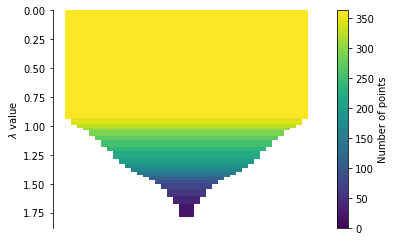

In [9]:
inq_clusterer.condensed_tree_.plot()

In [10]:
inq_clusterer.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

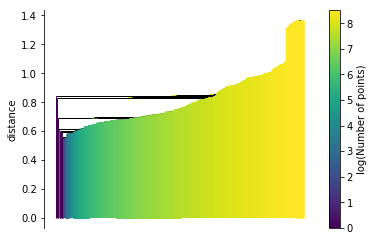

In [11]:
inq_clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

In [12]:
clusterer = hdbscan.HDBSCAN(core_dist_n_jobs=-2)
disc_clusterer = clusterer.fit(unit_vecs_list[1])

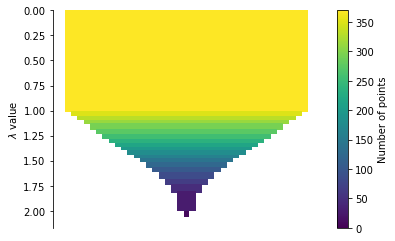

In [13]:
disc_clusterer.condensed_tree_.plot()

In [14]:
core_clusterer = clusterer.fit(np.append(unit_cores_list[0],unit_cores_list[1],axis=0))

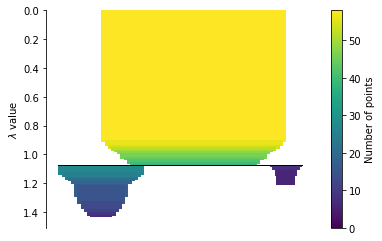

In [15]:
core_clusterer.condensed_tree_.plot()

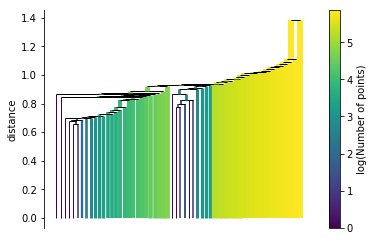

In [16]:
core_clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

In [17]:
core_clusterer.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1, -1, -1, -1, -1,  1,
       -1, -1, -1,  1,  1, -1,  1,  1, -1, -1, -1, -1,  0,  1, -1,  1,  1,
       -1, -1, -1, -1,  1,  1, -1])

In [18]:
core_clusterer.cluster_persistence_

array([0.15342729, 0.05781225])

In [19]:
# probability each word belongs to its designated cluster, 0s are just noise terms
core_clusterer.probabilities_[:28] # inquiry

array([0.80258044, 0.80472357, 0.82055231, 0.9978495 , 0.78185644,
       0.93604856, 0.9741281 , 0.90122544, 0.96136611, 0.80819042,
       1.        , 1.        , 0.        , 0.92180714, 0.83773764,
       1.        , 0.9871916 , 0.95874413, 0.79462112, 0.81933684,
       0.8404399 , 0.82325656, 1.        , 0.        , 0.97239425,
       0.75711546, 0.99360123, 1.        ])

In [20]:
core_clusterer.probabilities_[28:] # discipline

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.84140813, 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ])

In [21]:
len(core_list[0])

28

In [15]:
flatui = ["#3498db", "#e74c3c","#9b59b6", "#34495e", "#2ecc71"] # custom colors

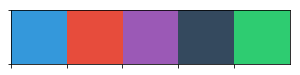

In [20]:
sns.palplot(sns.color_palette(flatui))

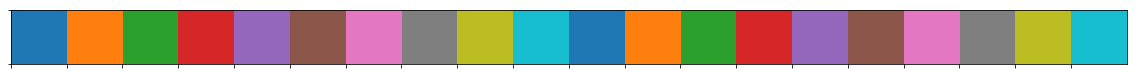

In [24]:
sns.palplot(sns.color_palette(n_colors = 20))

In [6]:
def visualize(data, words, labels, probs):
    projection = TSNE().fit_transform(data)
    color_palette = sns.color_palette(n_colors = len(set(labels)))
    cluster_colors = [color_palette[x] if x >= 0
                      else (0, 0, 0)
                      for x in labels]
#     cluster_member_colors = [sns.desaturate(x, p) for x, p in
#                              zip(cluster_colors, probs)]
#     plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=.5)
    plt.figure(figsize=(16, 16)) 
    for i, coord in enumerate(projection):
        plt.scatter(*coord, s=50, linewidth=0, c=cluster_colors[i], alpha=.5)
        plt.annotate(words[i], (coord[0], coord[1]))

In [32]:
def cluster_and_visualize(words, data, min_size = 5, random_state = None):
    """Clusters data using HDBSCAN and visualizes using TSNE
    
    min_size: min_cluster_size parameter for HDBSCAN
    data: list of wordvecs
    words: list of (string)words corresponding to data
    """
    clusterer = hdbscan.HDBSCAN(min_cluster_size = min_size, core_dist_n_jobs=-2)
    clusterer = clusterer.fit(data)
    projection = TSNE(random_state = random_state).fit_transform(data)
    color_palette = sns.color_palette(n_colors = len(set(clusterer.labels_)))
    cluster_colors = [color_palette[x] if x >= 0
                      else (0, 0, 0)
                      for x in clusterer.labels_]
    cluster_member_colors = [sns.desaturate(x, p) for x, p in
                             zip(cluster_colors, clusterer.probabilities_)]
#     plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=.5)
    plt.figure(figsize=(16, 16)) 
    for i, coord in enumerate(projection):
        plt.scatter(*coord, s=50, linewidth=0, c=cluster_member_colors[i], alpha=.5)
        plt.annotate(words[i], (coord[0], coord[1]))
    return clusterer

In [35]:
def visualize_dicts(words1, data1, words2, data2, min_size = 5):
    """Clusters data using HDBSCAN and visualizes using TSNE
    
    min_size: min_cluster_size parameter for HDBSCAN
    data: list of wordvecs
    words: list of (string)words corresponding to data
    """
    clusterer = hdbscan.HDBSCAN(min_cluster_size = min_size, core_dist_n_jobs=-2)
    clusterer = clusterer.fit(np.concatenate((data1,data2),axis = 0))
    projection = TSNE(random_state = 1).fit_transform(np.concatenate((data1,data2),axis = 0))
    color_palette = sns.color_palette(flatui)
    cluster_colors = [color_palette[0] for x in range(len(words1))] + [color_palette[1] for x in range(len(words2))]
#     plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=.5)
    plt.figure(figsize=(16, 16)) 
    for i, coord in enumerate(projection):
        plt.scatter(*coord, s=50, linewidth=0, c=cluster_colors[i], alpha=.5)
        plt.annotate((words1+words2)[i], (coord[0], coord[1]))
    return clusterer

### Visuals of both dicts, only diffference is coloring method

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=-2, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
    prediction_data=False)

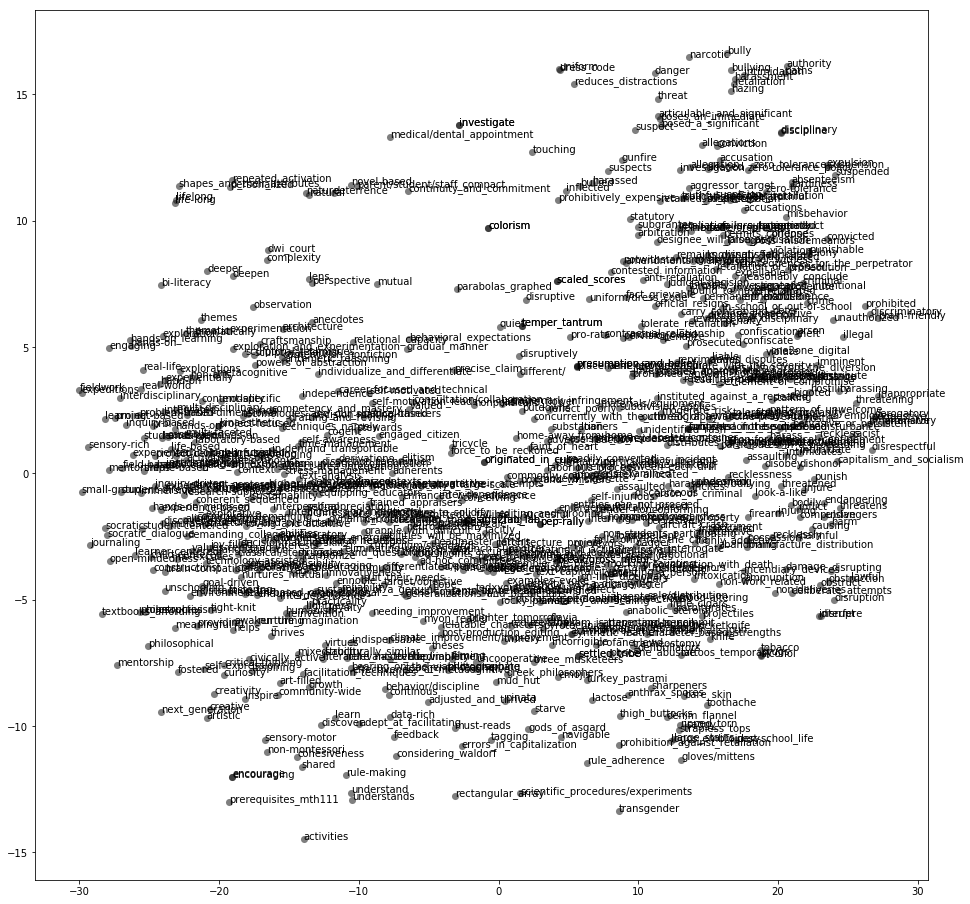

In [33]:
cluster_and_visualize(word_list[0]+word_list[1], np.concatenate((unit_vecs_list[0],unit_vecs_list[1]), axis = 0), random_state = 1) # visual of both dicts, colored based on hdbscan clustering(which gave no clustering)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=-2, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
    prediction_data=False)

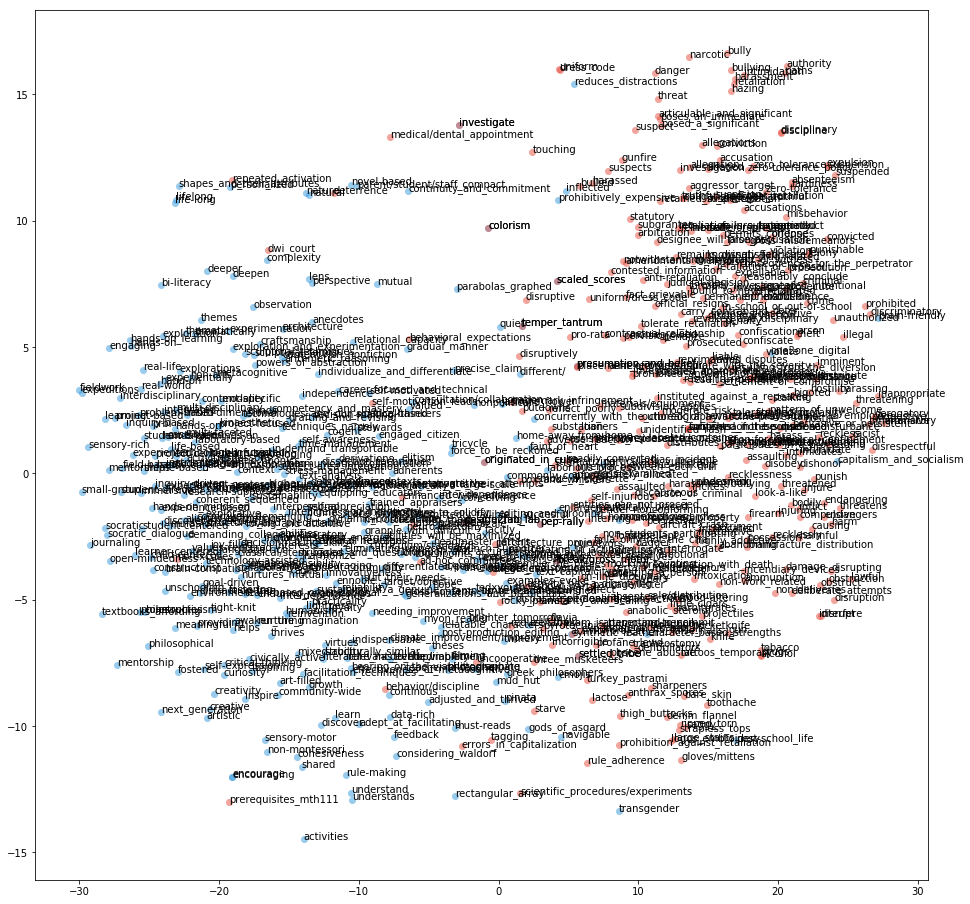

In [34]:
visualize_dicts(word_list[0], unit_vecs_list[0], word_list[1], unit_vecs_list[1]) # visual of both dicts, colored by dict

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=-2, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
    prediction_data=False)

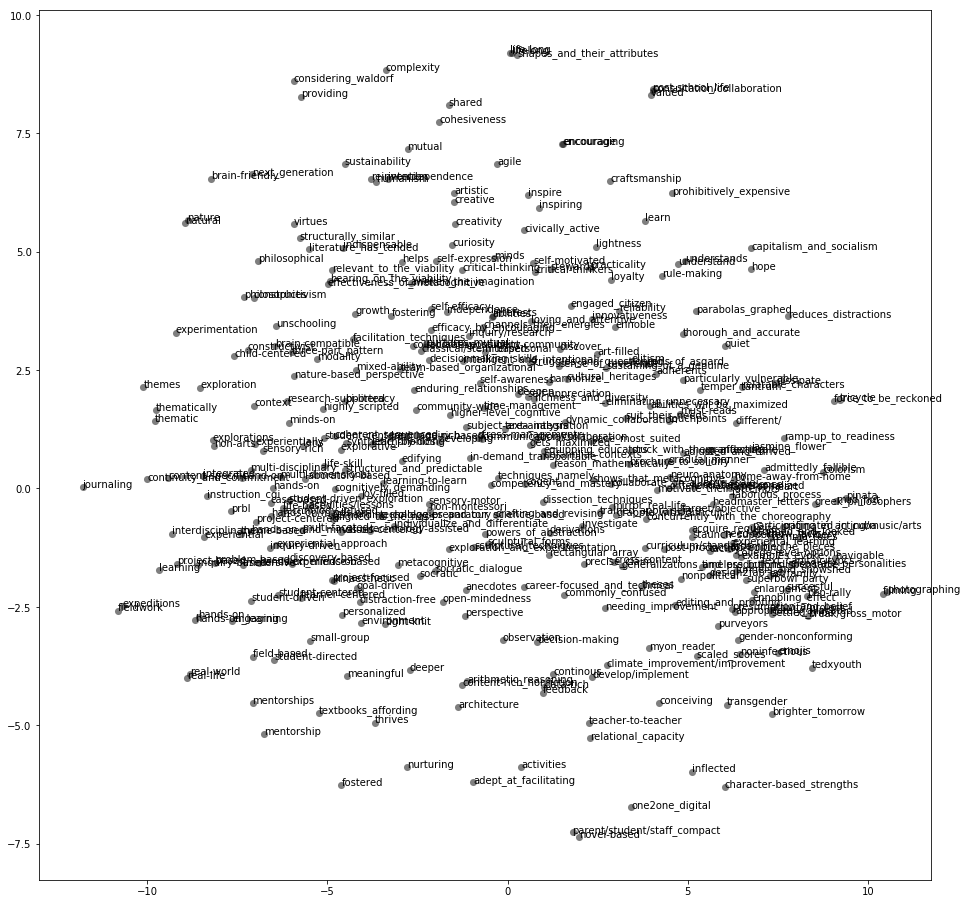

In [35]:
cluster_and_visualize(word_list[0], unit_vecs_list[0]) # inquiry dict

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=-2, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
    prediction_data=False)

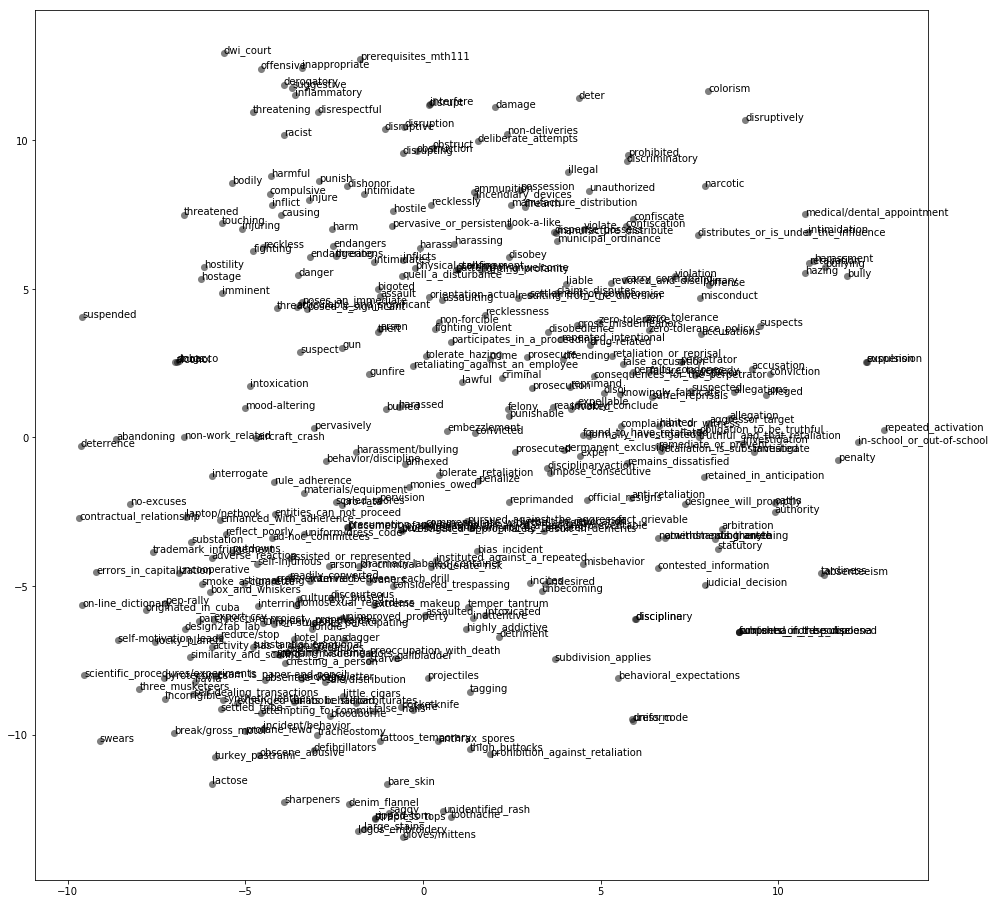

In [8]:
cluster_and_visualize(word_list[1], unit_vecs_list[1]) # discipline dict

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=-2, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
    prediction_data=False)

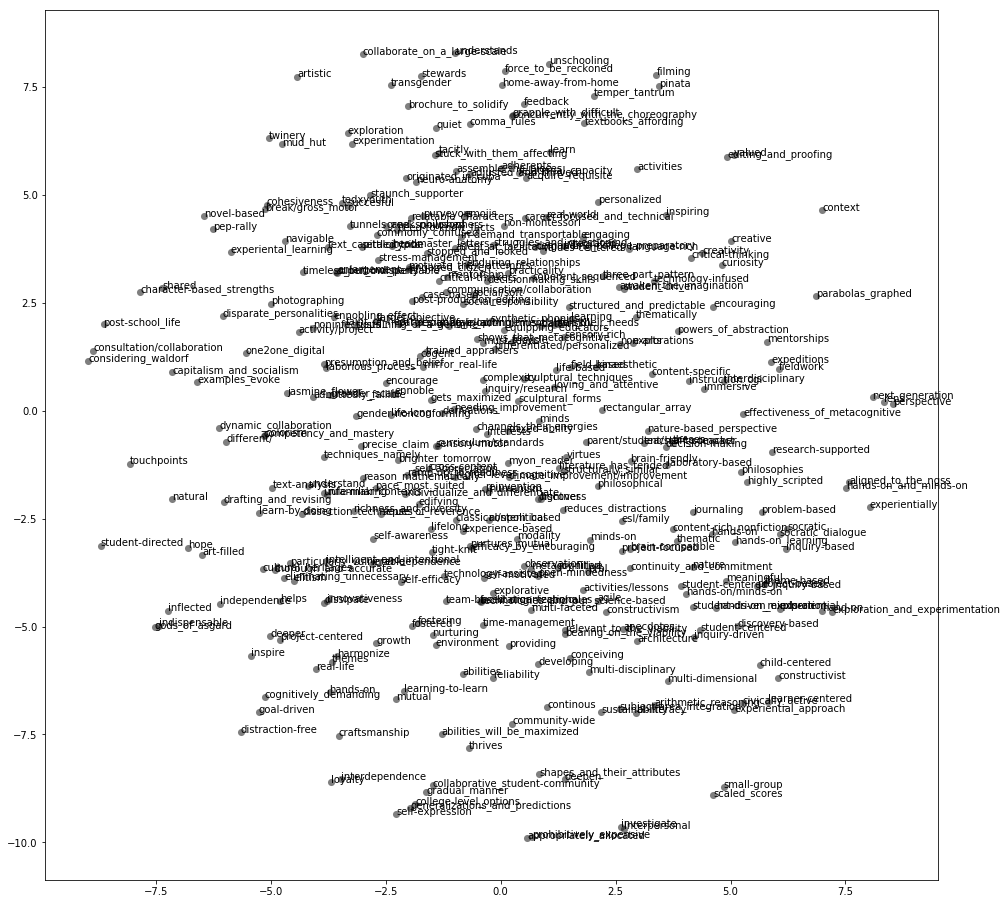

In [9]:
cluster_and_visualize(word_list[0]+word_list[1], unit_vecs_list[0]+unit_vecs_list[1]) # both full dicts

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=-2, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
    prediction_data=False)

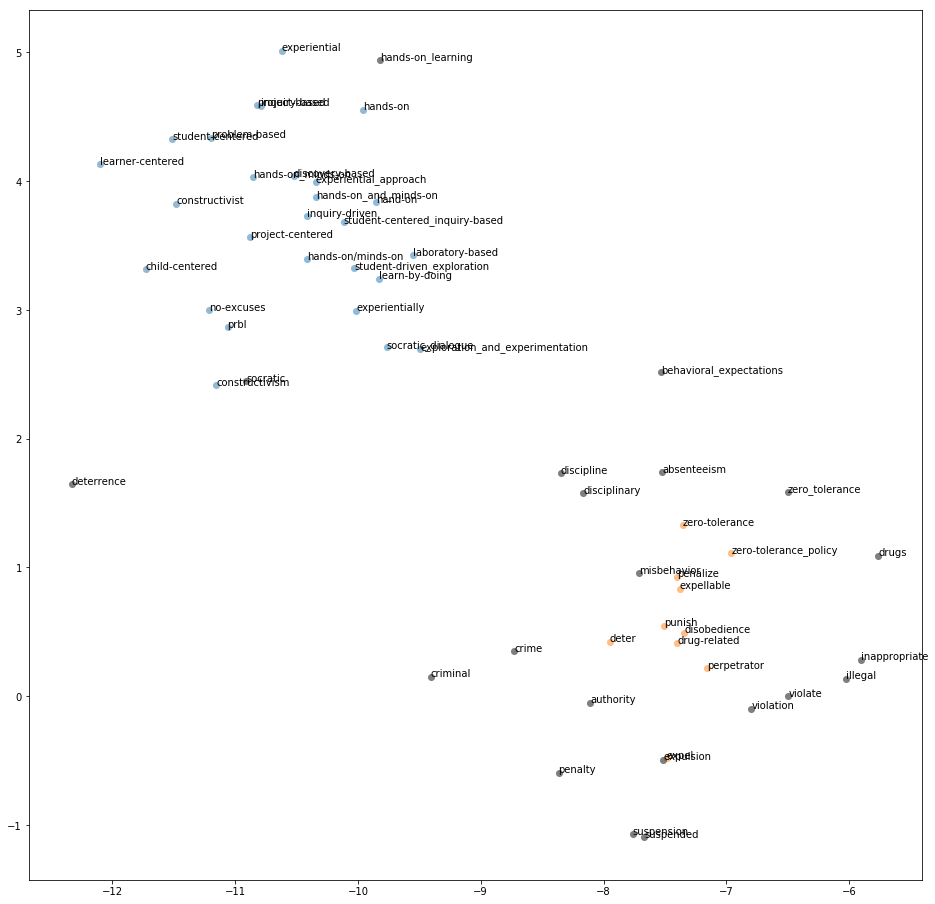

In [10]:
cluster_and_visualize(core_word_list[0]+core_word_list[1], np.append(unit_cores_list[0],unit_cores_list[1],axis=0))

## Full Model Clustering

In [5]:
word_vecs = model[model.vocab]
row_sums = np.linalg.norm(word_vecs, axis=1)
unit_vecs = word_vecs / row_sums[:, np.newaxis]

In [ ]:
start = time.time()
projection = TSNE().fit_transform(unit_vecs)
end = time.end()
print('Time Elapsed:{:f}'.format(end - start))

In [ ]:
len(list(model.vocab))

In [ ]:
clusterer = cluster_and_visualize(list(model.vocab),unit_vecs, 10)

In [36]:
with open ('fullmodel_labels', 'rb') as fp:
    full_labels = pickle.load(fp)

In [37]:
set(full_labels)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 

In [7]:
with open ('fullmodel_probs', 'rb') as fp:
    full_probs = pickle.load(fp)

### Results are reviewed in visualization.ipynb